In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import metapack as mp
from pathlib import Path
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt 

import numpy as np
import statsmodels.api as sm

lowess = sm.nonparametric.lowess

%run ./lib.py
%run ./weights.py

age_duration = {
    '-35': 12,    # 1
    '35-44': 10,  # 2 
    '45-54': 10,  # 3
    '55-64': 10 , # 4
    '65-74': 0,   # 5
    '75+': 0      # 6
}


source = "Survey of Consumer Finances, 2016 and 2019 pooled"


In [2]:
pkg = multi_open('federalreserve.gov-consumer_finances-2016e2019-inherit', print_ref=True)
#pkg = mp.jupyter.open_source_package()
pkg

Opening:  index:federalreserve.gov-consumer_finances-2016e2019-inherit


# Survey of Consumer Finances, Inheritance Extract
`federalreserve.gov-consumer_finances-2016e2019-inherit-1.2.5` Last Update: 2020-12-11T04:21:02

_An Extract from the survey of consumer finances for studying networth and ineritance, from multiple years_


This is an extract of the 2016 and 2019 Survey of Consumer Finances, with extracted variables
and recoded variables oriented toward studying inheritance.


 
## Images

[![doc_img](docs/networth_race_inc.png "networth_race_inc")](docs/networth_race_inc.png)

Net Worth by Income Percentile and Race## Notes

* Version 1.2.2 Added the Inflatable flag
* Version 1.2.3 Inflated dollar ammounts to current dollars
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [inherit_scf_16_19](data/inherit_scf_16_19.csv)**. Extract of the 2016 and 2019 SCF for inheritance and networth

## References
<ul><li> <strong>scf</string>, <em>metapack+http://library.metatab.org/federalreserve.gov-consumer_finances.csv</em>. Survey of consumer finances data packages</li><li> <strong><a href="https://fred.stlouisfed.org/graph/fredgraph.csv?&id=CPIAUCSL">cpi</a></strong>. Consumer Price Index</li><ul>

In [3]:
pkg.reference('scf').package

# Survey of Consumer Finances
`federalreserve.gov-consumer_finances-1.2.4` Last Update: 2020-12-11T04:15:57

_References to the Survey of Consumer Finances_


The data package provides references to the main SCF files. The package does not contain data. 

* [How Does Intergenerational Wealth Transmission Affect Wealth Concentration? ](https://www.federalreserve.gov/econres/notes/feds-notes/how-does-intergenerational-wealth-transmission-affect-wealth-concentration-20180601.htm)
* [The Dynamics of the Racial Wealth Gap](http://www.people.virginia.edu/~ey2d/aliprantis_carroll_young_2019b.pdf)

Feiveson and Sabelhaus calculate that 26% of welath is due to transfers, because they assume that all of the transfer is invested at 3%. THis is clearly nonsense0
## Documentation Links

* [2019 Codebook](https://www.federalreserve.gov/econres/files/codebk2019.txt) 
* [2016 Codebook](https://www.federalreserve.gov/econres/files/codebk2016.txt) 
* [2016 Extract SAS Macro](https://www.federalreserve.gov/econres/files/bulletin.macro.txt) 
* [2013 Codebook](https://www.federalreserve.gov/econres/files/codebk2013.txt) 
* [2013 Extract SAS Macro](https://www.federalreserve.gov/econres/files/bulletin.macro.txt) 
* [2010 Codebook](https://www.federalreserve.gov/econres/files/codebk2010.txt) 
* [2010 Extract SAS Macro](https://www.federalreserve.gov/econres/files/bulletin.macro.txt) 
* [Documentation Page](http://library.metatab.org/federalreserve.gov-consumer_finances-1.2.4/index.html) 
* [Homepage](https://www.federalreserve.gov/econres/scfindex.htm) 
* [2016 Homepage](https://www.federalreserve.gov/econres/scf_2016.htm) 
* [2013 Home Page](https://www.federalreserve.gov/econres/scf_2013.htm) 
* [2010 Home Page](https://www.federalreserve.gov/econres/scf_2010.htm) 

 
## Notes

* scf_extract_10 is broken; Pandas can't load the version of Stat for this file
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)


## References
<ul><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2019s.zip#p19i6.dta">scf_public_19</a></strong>. Survey of consumer finances, full public dataset, 2019</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scfp2019s.zip#rscfp2019.dta">scf_extract_19</a></strong>. Survey of consumer finances, public extract, 2019</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2019rw1s.zip#p19_rw1.dta">scf_weights_19</a></strong>. Survey of consumer finances, replicate weights, 2019</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2016s.zip#p16i6.dta">scf_public_16</a></strong>. Survey of consumer finances, full public dataset, 2016</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scfp2016s.zip#rscfp2016.dta">scf_extract_16</a></strong>. Survey of consumer finances, public extract, 2016</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2016rw1s.zip#p16_rw1.dta">scf_weights_16</a></strong>. Survey of consumer finances, replicate weights, 2016</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2013s.zip#p13i6.dta">scf_public_13</a></strong>. Survey of consumer finances, full public dataset, 2013</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scfp2013s.zip#rscfp2013.dta">scf_extract_13</a></strong>. Survey of consumer finances, public extract, 2013</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2013rw1s.zip#p13_rw1.dta">scf_weights_13</a></strong>. Survey of consumer finances, replicate weights, 2013</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2010s.zip#p10i6.dta">scf_public_10</a></strong>. Survey of consumer finances, full public dataset, 2010</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scfp2010.zip#scfp2010&target_format=dta">scf_extract_10</a></strong>. Survey of consumer finances, public extract, 2010</li><li> 

In [4]:
pkg.resource('inherit_scf_16_19')

Header,Type,Description
year,integer,Year of the SCL reelase the record was drawn from
case_id,integer,
record_id,integer,
implicate_id,integer,"Impicate number, 1 to 5"
age_1,integer,Age of first household adult
age_2,integer,Age of second household adult.
hisp,integer,Is the HH Hispanic
race,string,Simpified race for HH
addtional_race,integer,
unusual_income,integer,


In [5]:
df = pkg.resource('inherit_scf_16_19').dataframe()
df

,year,case_id,record_id,implicate_id,age_1,age_2,hisp,race,addtional_race,unusual_income,...,n_transfer,any_transfer,any_inherit,hhsize,networthpc,assetpc,gi_pv_10,gi_pv_7,gi_pv_5,gi_value_cd
0,2016,1,11,1,71,0,5,white,5,3,...,0,0,0,1,2.023457e+05,2.027808e+05,0.0,0.0,0.0,0.0
1,2016,1,12,2,71,0,5,white,5,3,...,0,0,0,1,2.024716e+05,2.028953e+05,0.0,0.0,0.0,0.0
2,2016,1,13,3,71,0,5,white,5,3,...,0,0,0,1,2.023571e+05,2.027808e+05,0.0,0.0,0.0,0.0
3,2016,1,14,4,71,0,5,white,5,3,...,0,0,0,1,2.023571e+05,2.027808e+05,0.0,0.0,0.0,0.0
4,2016,1,15,5,71,0,5,white,5,3,...,0,0,0,1,2.024716e+05,2.028953e+05,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60120,2019,5813,58131,1,51,55,5,white,5,3,...,0,0,0,2,4.109903e+06,4.133588e+06,0.0,0.0,0.0,0.0
60121,2019,5813,58132,2,51,55,5,white,5,3,...,0,0,0,2,4.160287e+06,4.184510e+06,0.0,0.0,0.0,0.0
60122,2019,5813,58133,3,51,55,5,white,5,3,...,0,0,0,2,4.029484e+06,4.054245e+06,0.0,0.0,0.0,0.0
60123,2019,5813,58134,4,51,55,5,white,5,3,...,0,0,0,2,4.303847e+06,4.332914e+06,0.0,0.0,0.0,0.0


In [6]:
%run ./lib.py
df =   make_descriptive_df(df)    

In [7]:
df['networth_pv10'] = df.networth - df.gi_pv_10
df['networth_pv7'] = df.networth - df.gi_pv_7
df['networth_pv5'] = df.networth - df.gi_pv_5
df['networth_pv0'] = df.networth - df.gi_value_cd

df90 = df[ (df.networth_pctle <= 90) & (df.nincpctle < 90) ] # Exclude those in top 10pct of gifts. 

#dfs = df.sample(500_000, replace=True, weights=df.wt0)

In [8]:
gs90 = lambda df: df[ (df.gi_sum_decile < 9)] # Exclude those in top 10pct of gifts. 
dfs90 =  lambda df: df[(df.nincpctle < 9)]
dfsu10 = lambda df: df[(df.nincpctle >= 9)]
dfsm1 =  lambda df: df[(df.nincpctle >= 4) & (df.nincpctle <= 6) ] # Middle incomes
dfsm2 =  lambda df: df[(df.nincpctle >= 2) & (df.nincpctle <= 8) ] # Middle incomes

In [9]:
dfs = df.sample(500_000, replace=True, weights=df.wt0)

dfs.head().T

,22836,20089,38292,11806,23781
year,2016,2016,2019,2016,2016
case_id,4578,4027,1418,2366,4767
record_id,45782,40275,14183,23662,47672
implicate_id,2,5,3,2,2
age_1,33,34,46,59,59
...,...,...,...,...,...
networth_pctle,22,21,37,0,85
networth_pv10,56116.8,42210.9,179916,-34350.2,1.17454e+07
networth_pv7,56116.8,43436.5,179916,-34350.2,1.17454e+07
networth_pv5,56116.8,44159.2,179916,-34350.2,1.17454e+07


In [10]:
dfs.groupby('nincpctle').norminc.mean()

nincpctle
0     1.308851e+04
10    2.490288e+04
20    3.459112e+04
30    4.520097e+04
40    5.695980e+04
50    7.155747e+04
60    9.011785e+04
70    1.154052e+05
80    1.622998e+05
90    2.398544e+05
95    4.456850e+05
99    2.183846e+06
Name: norminc, dtype: float64

In [11]:
# Completely forgot what this was for
if False:
    t = dfs.copy()
    t['wvalue'] = t.gi_value_cd * t.wt0

    tw = t[t.race=='white'].groupby('age_at_gi').wvalue.sum() / t[t.race=='white'].wt0.sum()
    tb = t[t.race=='black'].groupby('age_at_gi').wvalue.sum() / t[t.race=='black'].wt0.sum()

    t = pd.DataFrame(index=np.arange(25,65).astype(float))
    t = t.join(pd.Series(lowess(tw, tw.index, frac=.3)[:,1],index=tw.index).rename('white'), how='left' )
    t = t.join(pd.Series(lowess(tb, tb.index, frac=.3)[:,1],index=tb.index).rename('black'), how='left' )
    t = t.interpolate()

    t.plot()

In [12]:
df['race'] = df.race.astype('category')
df.head()

,year,case_id,record_id,implicate_id,age_1,age_2,hisp,race,addtional_race,unusual_income,...,gi_pv_7,gi_pv_5,gi_value_cd,gi_value_cd_decile,gi_value_cd_pctle,networth_pctle,networth_pv10,networth_pv7,networth_pv5,networth_pv0
0,2016,1,11,1,71,0,5,white,5,3,...,0.0,0.0,0.0,0.0,0.0,39.0,202345.699011,202345.699011,202345.699011,202345.699011
1,2016,1,12,2,71,0,5,white,5,3,...,0.0,0.0,0.0,0.0,0.0,39.0,202471.649820,202471.649820,202471.649820,202471.649820
2,2016,1,13,3,71,0,5,white,5,3,...,0.0,0.0,0.0,0.0,0.0,39.0,202357.149085,202357.149085,202357.149085,202357.149085
3,2016,1,14,4,71,0,5,white,5,3,...,0.0,0.0,0.0,0.0,0.0,39.0,202357.149085,202357.149085,202357.149085,202357.149085
4,2016,1,15,5,71,0,5,white,5,3,...,0.0,0.0,0.0,0.0,0.0,39.0,202471.649820,202471.649820,202471.649820,202471.649820


In [13]:
# Check that means on the dfs dataframe are similar to weighted means on the root dataset. 

dfs.norminc.mean(), wmean(df, 'norminc', 'wt0'), len(dfs)

(117591.90641921628, 117184.07767764002, 500000)

# Remove Gifts and Transfers

Pull out the NPV of gifts and transfers. 



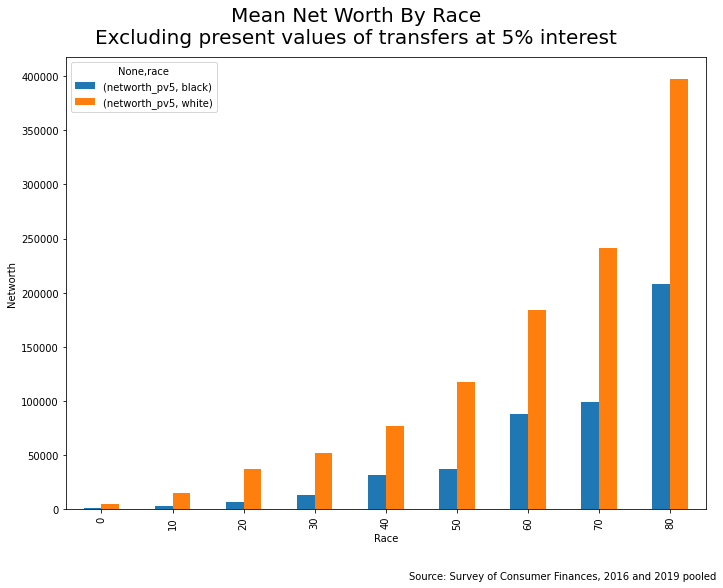

In [35]:
t = dfs[(dfs.nincpctle < 90)]
t = t[['race','nincpctle', 'networth_pv5']]
t = t.groupby(['nincpctle', 'race']).median().unstack()

with new_plot('Mean Net Worth By Race\nExcluding present values of transfers at 5% interest', source,
             xlabel='Race', ylabel='Networth', layout=[0, 0.03, 1, 0.91]) as (fig,ax):
    
    t.plot.bar(ax=ax)


In [15]:
t = dfs90(df)
t = t[ (t.race.isin(['white','black']) )]
t = t[['race','nincpctle', 'agecl', 'networth']]
t = t.groupby(['nincpctle', 'agecl', 'race']).median().unstack().droplevel(0, axis=1)
t = t.black/t.white

In [16]:
t.unstack()

agecl,<35,35-44,45-54,55-64,65-74,>=75
nincpctle,,,,,,
0,0.128058,0.77109,0.080915,0.046211,0.173091,0.681439


# Lifetime Earnings

In [18]:
def make_le(df, agg='median'):
    """Normal income per year, smoothed"""

    # Compute Lifetime earnings
    assert agg in ('median','mean')
    
    t = df.groupby([df.age_1.astype(int), 'race']).norminc
    
    if agg == 'median':
        t = t.median()
    else:
        t = t.mean()
    
    t = t.unstack()[['black', 'white']]
    
    lifetime_earnings = t.interpolate().fillna(method='bfill')
    
    lowess = sm.nonparametric.lowess

    smooth_le = pd.DataFrame(
    { 
        'age': lifetime_earnings.index,
        'white': lowess(lifetime_earnings.white, lifetime_earnings.index, frac=.3)[:,1],
        'black':lowess(lifetime_earnings.black, lifetime_earnings.index, frac=.3)[:,1]
    }).set_index('age').loc[25:65]
    
    return smooth_le

def invest_le(le, con_prop, r):
    """Calculate value of investments from lifetimes earnings le, 
    contributing con_prop portion of income each year, at rate of return r"""
    def f_():
        total = 0
        for idx, earn in le.iteritems():
            total += earn * con_prop
            total += total*r
            yield total
        
    rows = list(f_())

    return pd.Series(rows, index=le.index)

def make_pan(df, agg='median', var='networth'):
    
    import numpy as np
    import statsmodels.api as sm

    assert agg in ('median','mean')
    
    t = df.groupby([df.age_1.astype(int), 'race'])[var]
    
    if agg == 'median':
        t = t.median()
    else:
        t = t.mean()
    
    
    t = t.unstack()[['black', 'white']]
    
    lifetime_earnings = t.interpolate().fillna(method='bfill')
    
    lowess = sm.nonparametric.lowess

    smooth_le = pd.DataFrame(
    { 
        'age': lifetime_earnings.index,
        'white': lowess(lifetime_earnings.white, lifetime_earnings.index, frac=.3)[:,1],
        'black':lowess(lifetime_earnings.black, lifetime_earnings.index, frac=.3)[:,1]
    }).set_index('age').loc[25:65]
    
    return smooth_le

In [19]:
t = dfs[(dfs.age_1 >= 55) & (dfs.age_1 < 65) & (dfs.married == 1) ]
t[(t.race == 'white')].networth.median(), t[(t.race == 'black')].networth.median()


(521092.84529202327, 89883.07702795832)

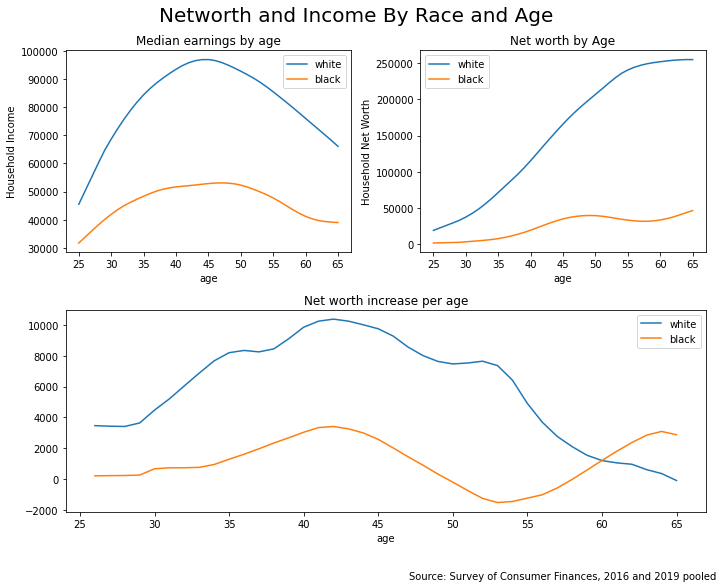

In [63]:
import warnings
# Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
# The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. 
# Use ax.get_subplotspec().rowspan.start instead. layout[ax.rowNum, ax.colNum] = ax.get_visible()
warnings.simplefilter('ignore')
 
nt = dfs[dfs.n_transfer == 0]
le = make_le(nt, agg='median')
pan = make_pan(nt, agg='median')
    
with new_plot('Networth and Income By Race and Age', source, panes=3) as (fig,ax):
    
    ax[0].set_title('Median earnings by age')
    ax[0].set_ylabel('Household Income')
    le.plot(ax=ax[0])

    ax[1].set_title('Net worth by Age')
    ax[1].set_ylabel('Household Net Worth')
    pan.plot(ax=ax[1])
    
    ax[2].set_title('Net worth increase per age')
    (pan.diff()).plot(ax=ax[2])



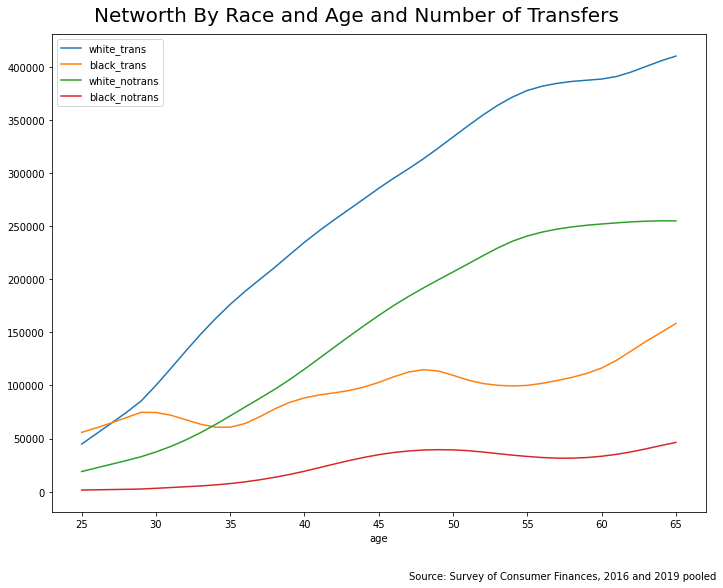

In [75]:

let = make_pan(dfs[dfs.n_transfer == 1], agg='median')
let.columns = [c+'_trans' for c in let.columns]
lent = make_pan(dfs[dfs.n_transfer == 0], agg='median')
lent.columns = [c+'_notrans' for c in lent.columns]

t = let.join(lent)

with new_plot('Networth By Race and Age and Number of Transfers', source, panes=1) as (fig,ax):
    t.plot(ax=ax)
    

In [43]:
dfs90(df).groupby(['agecl','race']).gi_sum.mean().unstack()

race,black,white
agecl,,
<35,29.213816,9792.215774
35-44,0.000000,40552.240175
45-54,5585.044199,22011.648734
55-64,2433.642424,24672.648089
65-74,9047.064220,230750.858144
>=75,0.000000,279226.539394


In [22]:
# Median gi among households who have recieved some
t = (df[df.gi_sum > 0]).groupby(['agecl','race']).gi_sum.median().unstack()
t

race,black,white
agecl,,
<35,10765,22607
35-44,43062,54904
45-54,64594,86125
55-64,43062,129188
65-74,69438,161485
>=75,96891,107656


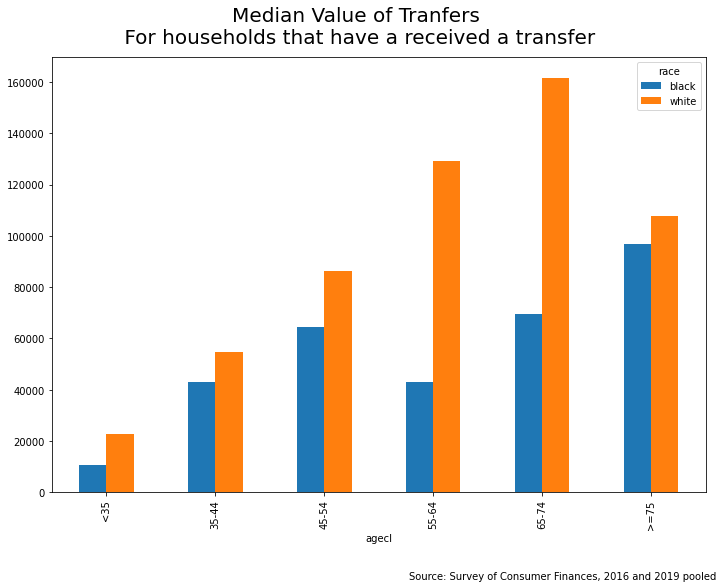

In [23]:
t = df
t = (t[t.gi_sum > 0]).groupby(['agecl','race']).gi_sum.median().unstack()

with new_plot('Median Value of Tranfers\n For households that have a received a transfer', source, 
              layout=[0, 0.03, 1, 0.91]) as (fig,ax):
    t.plot(ax=ax, kind='bar')

# Inheritances For People Younger than 45

In [55]:
t = dfs90(dfs)
dfsy45 = t[t.age_1<45] # Less than 90th percentile income, younger than 45 
dfso45 = t[t.age_1>=45] 

In [56]:
dfs.groupby('race').any_transfer.mean()

race
black    0.093745
white    0.276396
Name: any_transfer, dtype: float64

In [57]:
dfsy45.groupby('race').any_transfer.mean()

race
black    0.017526
white    0.120813
Name: any_transfer, dtype: float64

In [58]:
dfsy45.groupby('race').any_inherit.mean()

race
black    0.017526
white    0.080356
Name: any_inherit, dtype: float64

In [59]:
dfsy45[dfsy45.any_transfer==1].groupby('race').gi_sum.mean()

race
black     1194.258824
white    97062.526882
Name: gi_sum, dtype: float64

Older people are much more likely to recieve an inheritance. For Whites, about 3x. 

# Sanity Check. 

In [ ]:
dfso45[dfso45.any_transfer==1].groupby('race').gi_sum.median()

In [ ]:
dfs[(dfs.norminc <= dfs90.norminc.max()) & (dfs.age_1 > 45) & (dfs.any_transfer==1) & (dfs.gi_sum_decile < 9) ].groupby('race').gi_sum.median()

In [ ]:
#df[(df.norminc <= dfs90.norminc.max()) & (df.age_1 > 45) & (df.any_transfer==1)  & (df.gi_sum_decile < 9)].groupby('race').apply(wmean, 'gi_sum','wt0')

In [ ]:
# Simulated Equal Earnings

# Adjusting for Household size

Probably dont need to do this -- it should be handed in regressions by the MARRIED variable, 
but it does have value for descriptive statistics


In [51]:
t = dfs90(dfs)

In [52]:
t.head().T

,21930,51832,5443,15964,44940
year,2016,2019,2016,2016,2019
case_id,4397,4143,1092,3200,2758
record_id,43971,41433,10924,32005,27581
implicate_id,1,3,4,5,1
age_1,57,23,74,66,26
...,...,...,...,...,...
networth_pctle,21,0,47,13,0
networth_pv10,-34919.7,-1784.95,-1.14986e+08,18091.1,-4629.24
networth_pv7,-23399.2,-1784.95,-2.67971e+07,18091.1,-4629.24
networth_pv5,-16605.5,-1784.95,-1.06795e+07,18091.1,-4629.24


In [53]:
t.groupby(['race','hhsize']).networthpc.median().unstack()

hhsize,1,2
race,,
black,1711.742079,2604.891723
white,10780.244207,25419.163185


In [54]:
t.groupby('race').hhsize.mean()

race
black    1.132748
white    1.114687
Name: hhsize, dtype: float64

# Difference between households with and without transfers

Grouping by gi_sum decile completely closes weath gap 

In [ ]:
dfs90.groupby('race').networth.median()

In [ ]:
dfs.groupby('race').networth.median(), dfs.groupby('race').networth.mean()

In [ ]:
t=dfs90.groupby(['race', dfs90.gi_sum_decile]).networth.median().to_frame()
t = t.unstack().T.round(-2).astype(int)
t

In [ ]:
t.black.divide(t.white)


In [ ]:
t=dfs90.groupby(['race', dfs90.gi_sum_decile]).norminc.median().to_frame()
t = t.unstack().T.round(-2).astype(int)
t

In [ ]:
t.black.divide(t.white)


In [ ]:
t = dfs90[dfs90.gi_sum_decile>=5]
t=t.groupby(['race', 'income_decile']).networth.median().to_frame()
t = t.unstack().round(-2).astype('Int64').T
t

In [ ]:
t.black.divide(t.white)
